<a href="https://colab.research.google.com/github/SamSun3105/Personal-Expense-Tracker1/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Shivam Suman
# Applied Data Science with Pyton
# Course-end Project 2

In [6]:
# Read the dataframe from csv
import warnings # Suppress warnings for cleaner output
warnings.filterwarnings('ignore') # Ignore all warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime


df = pd.read_csv('/content/AusApparalSales4thQrt2020.csv')
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [7]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (7560, 6)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # standrdizing the date from object
df['Time'] = df['Time'].astype(str)
df['State'] = df['State'].astype(str)
df['Group'] = df['Group'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [10]:
df.columns = df.columns.str.lower()
df

,date,time,state,group,unit,sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [11]:
# Checking null values in dataframe
df.isnull().sum().sort_values(ascending=False)
# No Null Values/ missing values in dataframe

,0
date,0
time,0
state,0
group,0
unit,0
sales,0


In [12]:
#Normalizing the sales and Unit sold coulmn using min - max scaling
df['sales_norm'] = (df['sales'] - df['sales'].min()) / (df['sales'].max() - df['sales'].min()) # normalizes sales in sales_norm column
df['units_norm'] = (df['unit'] - df['unit'].min()) / (df['unit'].max() - df['unit'].min()) # normalizes unit of sales in units_norm column
df

,date,time,state,group,unit,sales,sales_norm,units_norm
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476
7556,2020-12-30,Evening,TAS,Kids,15,37500,0.206349,0.206349
7557,2020-12-30,Evening,TAS,Men,15,37500,0.206349,0.206349
7558,2020-12-30,Evening,TAS,Women,11,27500,0.142857,0.142857


In [13]:
# # Min Max scaling using Minmaxscaler() (getting the same result as above)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# temp = df
# temp[['norm_sales', 'norm_units']] = scaler.fit_transform(temp[['Sales', 'Unit']])
# temp

In [14]:
# Data after normalizing
df

,date,time,state,group,unit,sales,sales_norm,units_norm
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476
7556,2020-12-30,Evening,TAS,Kids,15,37500,0.206349,0.206349
7557,2020-12-30,Evening,TAS,Men,15,37500,0.206349,0.206349
7558,2020-12-30,Evening,TAS,Women,11,27500,0.142857,0.142857


In [15]:

# The data is clean and ready for analysis
# Checking all the catagorical columns
cat_cols = ['time', 'state', 'group']
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in time: [' Morning' ' Afternoon' ' Evening']
Unique values in state: [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
Unique values in group: [' Kids' ' Men' ' Women' ' Seniors']


In [16]:
print("-"*100)
# Lets check the value counts of each categorical column
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("."*100)

----------------------------------------------------------------------------------------------------
Value counts for time:
time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64
....................................................................................................
Value counts for state:
state
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64
....................................................................................................
Value counts for group:
group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64
....................................................................................................


In [17]:
df.head()

,date,time,state,group,unit,sales,sales_norm,units_norm
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873




*   First Visualize the sales of the company day wise , month wise for the entire quarter before furthur analysis.




In [18]:
# Day Wise Sales
dod = df.groupby(['date'])[['sales','unit']].sum()
dod

,sales,unit
date,,
2020-10-01,3720000,1488
2020-10-02,3715000,1486
2020-10-03,3890000,1556
2020-10-04,3720000,1488
2020-10-05,3862500,1545
...,...,...
2020-12-26,4715000,1886
2020-12-27,4637500,1855
2020-12-28,4595000,1838


In [19]:
# Let's chunk this quaterly data into monthly data using loc function
df_oct = dod.loc['2020-10-01':'2020-10-31']
df_nov = dod.loc['2020-11-01':'2020-11-30']
df_dec = dod.loc['2020-12-01':'2020-12-31']

In [20]:
df_oct.head()

,sales,unit
date,,
2020-10-01,3720000,1488
2020-10-02,3715000,1486
2020-10-03,3890000,1556
2020-10-04,3720000,1488
2020-10-05,3862500,1545


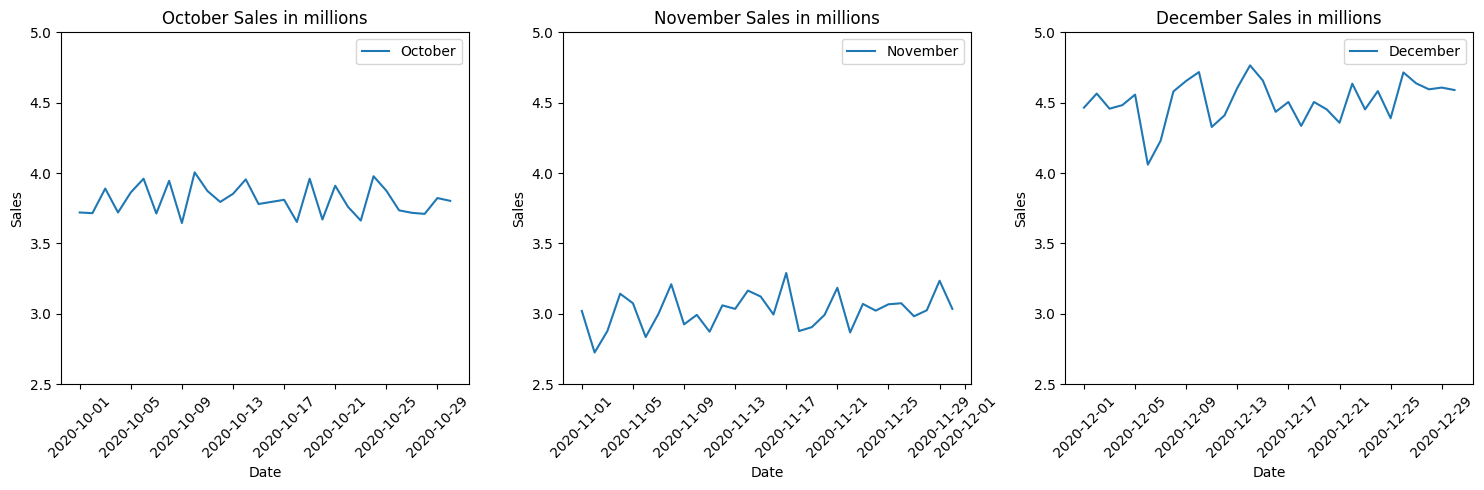

In [21]:
# Prepraing line graph of each month sales
# Create 1 row with 3 columns of subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

df_oct['sales'] = df_oct['sales'] / 1_000_000
lp_oct = sns.lineplot(data=df_oct, x='date', y='sales', label='October',ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('October Sales in millions')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Sales')
lp_oct.set_ylim(2.5 , 5.0)


# Prepraing line graph of each month
df_nov['sales'] = df_nov['sales'] / 1_000_000
lp_nov = sns.lineplot(data=df_nov, x='date', y='sales', label='November',ax = ax[1])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('November Sales in millions')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Sales')
lp_nov.set_ylim(2.5, 5.0)



# Prepraing line graph of each month
df_dec['sales'] = df_dec['sales'] / 1_000_000
lp_dec = sns.lineplot(data=df_dec, x='date', y='sales', label='December',ax = ax[2])
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('December Sales in millions')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Sales')
lp_dec.set_ylim(2.5, 5.0)

plt.tight_layout()
plt.show()




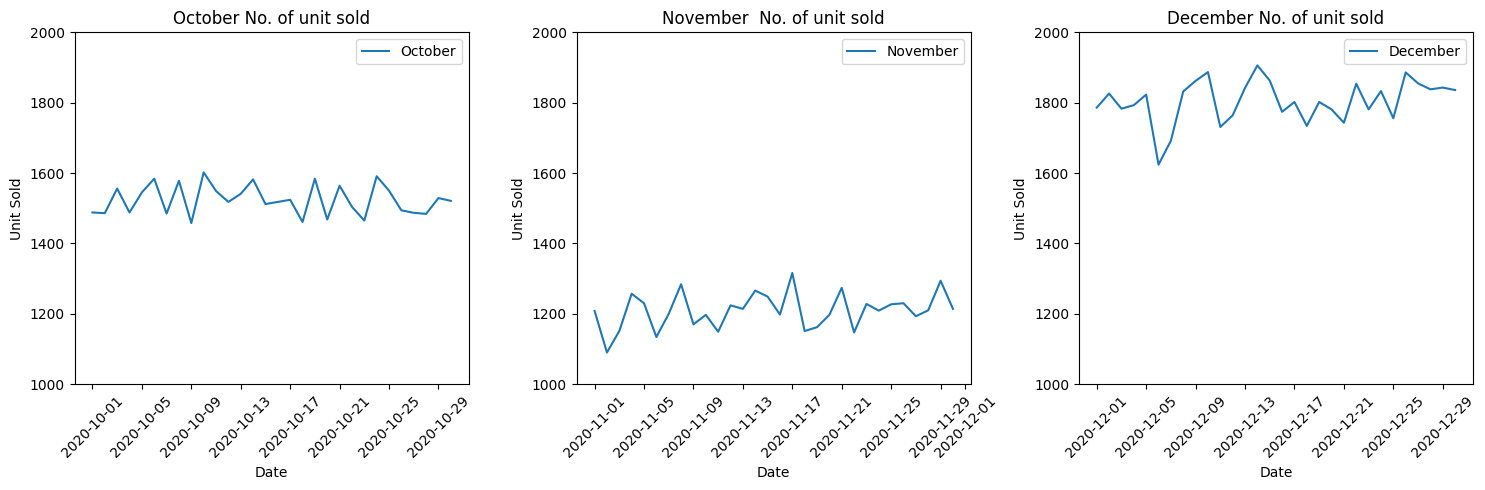

In [22]:
# Prepraing line graph of each month unit sold
# Create 1 row with 3 columns of subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns


lp_oct = sns.lineplot(data=df_oct, x='date', y='unit', label='October',ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('October No. of unit sold')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Unit Sold')
lp_oct.set_ylim(1000, 2000)


# Prepraing line graph of each month

lp_nov = sns.lineplot(data=df_nov, x='date', y='unit', label='November',ax = ax[1])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('November  No. of unit sold')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Unit Sold')
lp_nov.set_ylim(1000, 2000)



# Prepraing line graph of each month

lp_dec = sns.lineplot(data=df_dec, x='date', y='unit', label='December',ax = ax[2])
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('December No. of unit sold')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Unit Sold')
lp_dec.set_ylim(1000, 2000)

plt.tight_layout()
plt.show()



In [23]:
# Monthly data
df['month'] = df['date'].dt.month
df

,date,time,state,group,unit,sales,sales_norm,units_norm,month
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238,10
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238,10
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746,10
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349,10
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873,10
...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476,12
7556,2020-12-30,Evening,TAS,Kids,15,37500,0.206349,0.206349,12
7557,2020-12-30,Evening,TAS,Men,15,37500,0.206349,0.206349,12
7558,2020-12-30,Evening,TAS,Women,11,27500,0.142857,0.142857,12


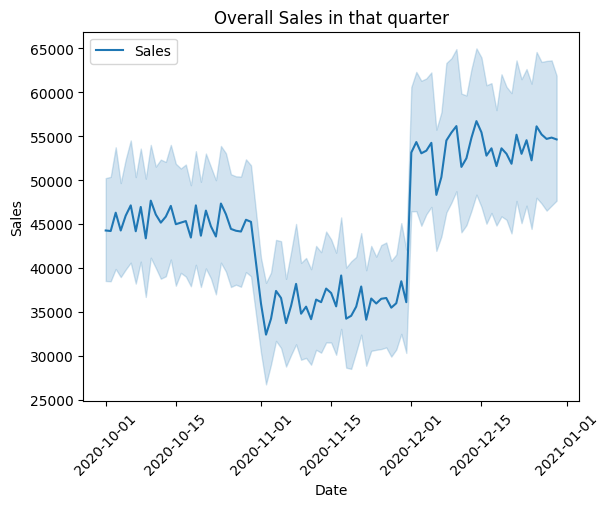

In [24]:
#Here we can see the day wise sales in this quater by the company
sns.lineplot(data=df, x='date', y='sales', label='Sales')
plt.tick_params(axis='x', rotation=45)
plt.title('Overall Sales in that quarter')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [65]:
df_weekly = df.resample('W-MON', on='date')['sales'].sum().reset_index()
df_weekly

,date,sales
0,2020-10-05,18907500
1,2020-10-12,26935000
2,2020-10-19,26805000
3,2020-10-26,26590000
4,2020-11-02,20797500
5,2020-11-09,21065000
6,2020-11-16,21242500
7,2020-11-23,21187500
8,2020-11-30,21442500
9,2020-12-07,30817500


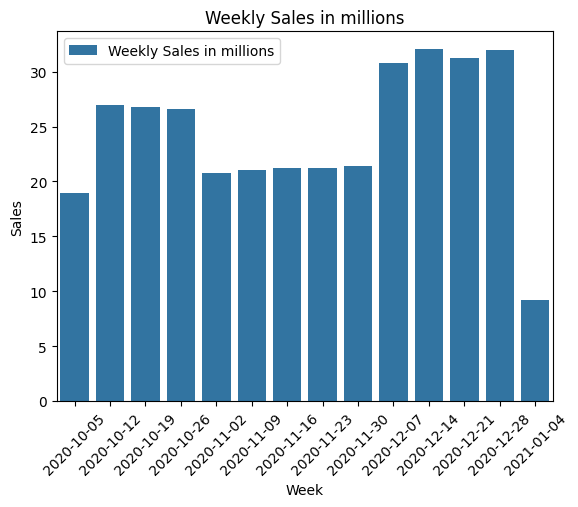

In [66]:
df_weekly['sales'] = df_weekly['sales']/1_000_000
sns.barplot(data= df_weekly, x='date', y='sales', label='Weekly Sales in millions')
plt.tick_params(axis='x', rotation=45)
plt.title('Weekly Sales in millions')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

In [67]:
# Note first and last weeks are incomplete (not 7 days data)

In [25]:
mom = df.groupby(['month'])[['sales','unit']].sum()
mom

,sales,unit
month,,
10,114290000,45716
11,90682500,36273
12,135330000,54132


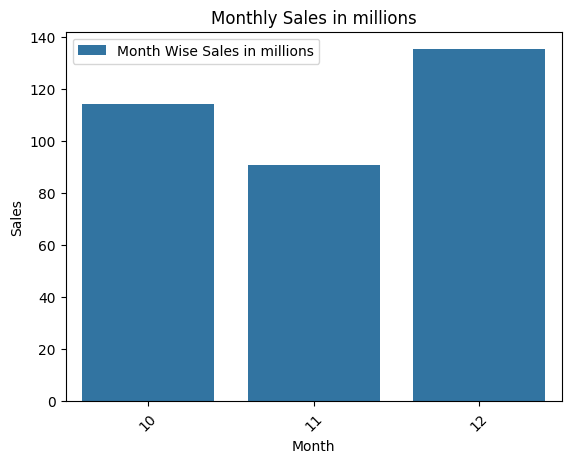

In [26]:
mom['sales'] = mom['sales']/1_000_000
sns.barplot(data= mom, x='month', y='sales', label='Month Wise Sales in millions')
plt.tick_params(axis='x', rotation=45)
plt.title('Monthly Sales in millions')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()



---
*   Monthly sales of the company shows December having the highest sales
---



In [27]:
df_oct.describe()

,sales,unit
count,30.000000,30.000000
mean,3.809667,1523.866667
std,0.107605,43.041867
min,3.645000,1458.000000
25%,3.718125,1487.250000
50%,3.798750,1519.500000
75%,3.886250,1554.500000
max,4.005000,1602.000000


In [28]:
df_nov.describe()

,sales,unit
count,30.000000,30.000000
mean,3.022750,1209.100000
std,0.127944,51.177413
min,2.725000,1090.000000
25%,2.939375,1175.750000
50%,3.023750,1209.500000
75%,3.075000,1230.000000
max,3.290000,1316.000000


In [29]:
df_dec.describe()

,sales,unit
count,30.000000,30.000000
mean,4.511000,1804.400000
std,0.153426,61.370329
min,4.060000,1624.000000
25%,4.439375,1775.750000
50%,4.531250,1812.500000
75%,4.606875,1842.750000
max,4.765000,1906.000000


In [30]:
#Above results shows
# Mean sales of Oct was 3.809667, Nov was 3.022750 and Dec Was 4.511000 millions per day.
# Median sales of Oct was 3.798750, Nov was 3.023750 and Dec Was 4.531250 millions per day.


**Box Plot Analysis**

In [31]:
# Box plot analysis for checking the out liers

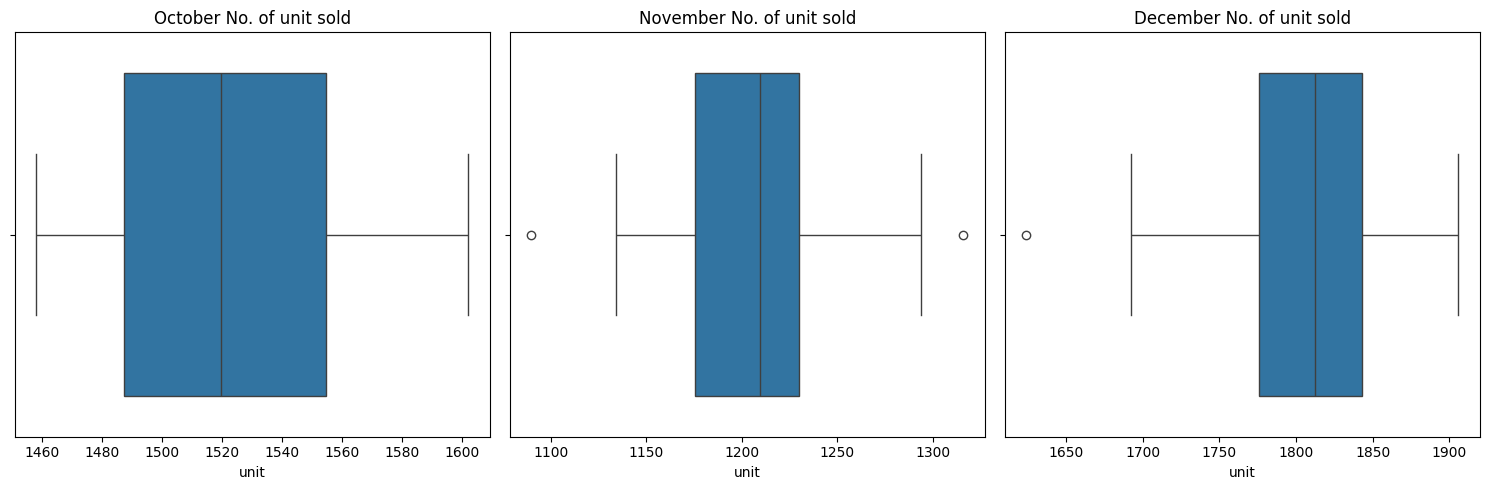

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
sns.boxplot(data=df_oct,x ='unit',ax = ax[0])
ax[0].set_title('October No. of unit sold')
sns.boxplot(data=df_nov,x ='unit',ax = ax[1])
ax[1].set_title('November No. of unit sold')
sns.boxplot(data=df_dec,x ='unit',ax = ax[2])
ax[2].set_title('December No. of unit sold')
plt.tight_layout()
plt.show()

In [33]:
# Data having very few outliers

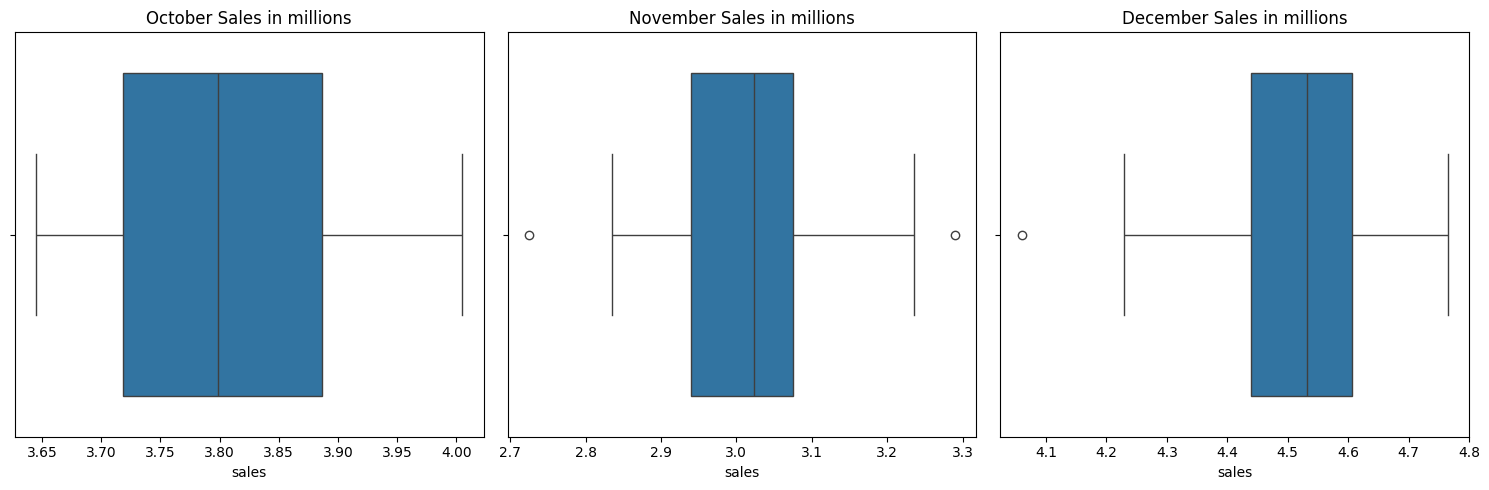

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
sns.boxplot(data=df_oct,x ='sales',ax = ax[0])
ax[0].set_title('October Sales in millions')
sns.boxplot(data=df_nov,x ='sales',ax = ax[1])
ax[1].set_title('November Sales in millions')
sns.boxplot(data=df_dec,x ='sales',ax = ax[2])
ax[2].set_title('December Sales in millions')
plt.tight_layout()
plt.show()

---



1.   State Wise sale Analysis for different demographic groups (kids,women,men,seniors)
2.   Group Wise sale Analysis for different states
3.   Time wise sale Analysis , to identify peak and off peak sales period.

---



In [107]:
# Average sales per day across cities
df.groupby(['state'])['sales'].mean().reset_index().sort_values(by='sales', ascending=False)

,state,sales
5,VIC,97745.370370
0,NSW,69416.666667
3,SA,54497.685185
2,QLD,30942.129630
4,TAS,21074.074074
1,NT,20907.407407
6,WA,20511.574074


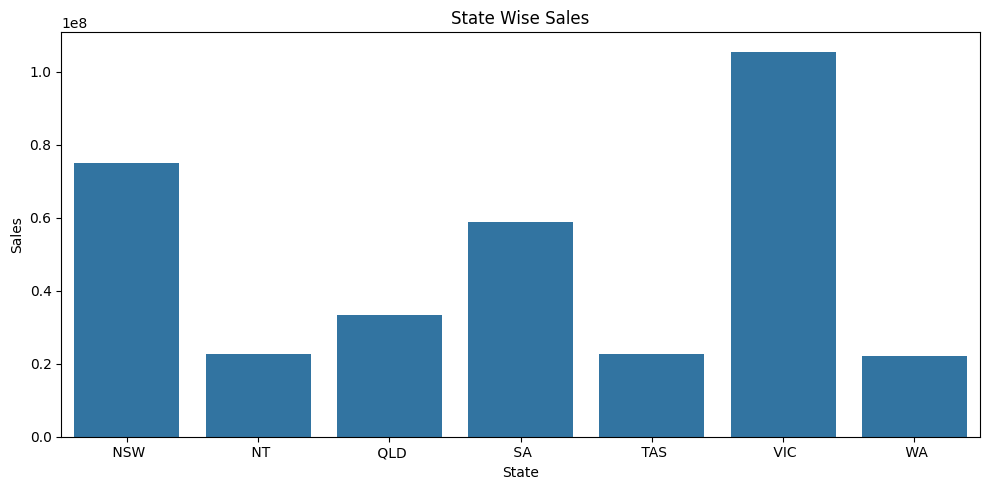

In [117]:
grouped_df = df.groupby(['state'])['sales'].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_df, x='state', y='sales')

plt.title('State Wise Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



*   Western Australia (WA) Having the lowest sales among all states
*   Victoria (VIC) Having the highest sales among all states.(And NT( Northern Territory), TA (Tasmania) having lower sales)



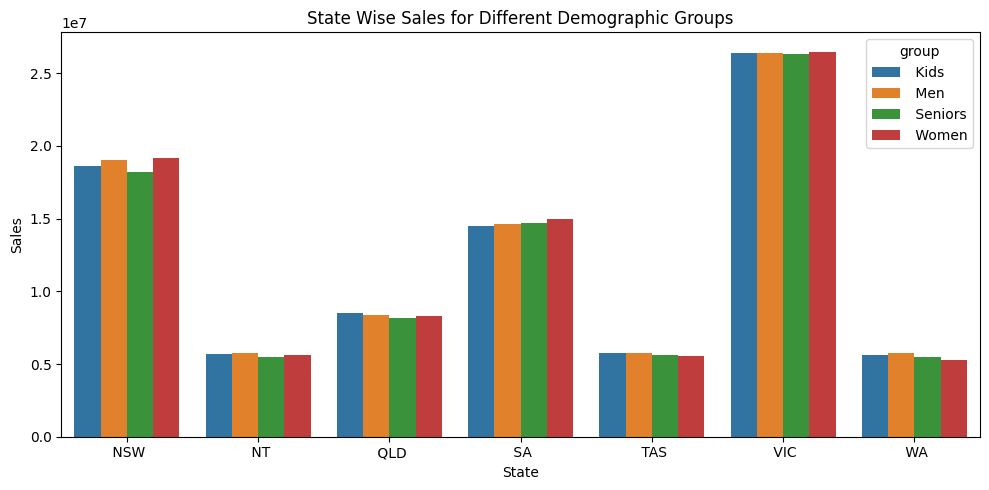

In [109]:
#1. Sate wise sales for different demographic groups (' Kids' ' Men' ' Women' ' Seniors')

grouped_df = df.groupby(['state', 'group'])['sales'].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_df, x='state', y='sales', hue='group')

plt.title('State Wise Sales for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [38]:
# From the above plot we can make inferences that in (NSW, SA, and VIC), Women's apparel sales are the highest.
# Whereas in states like NT, TAS, WA, QLD Men, and Kids apparel sales are highest.

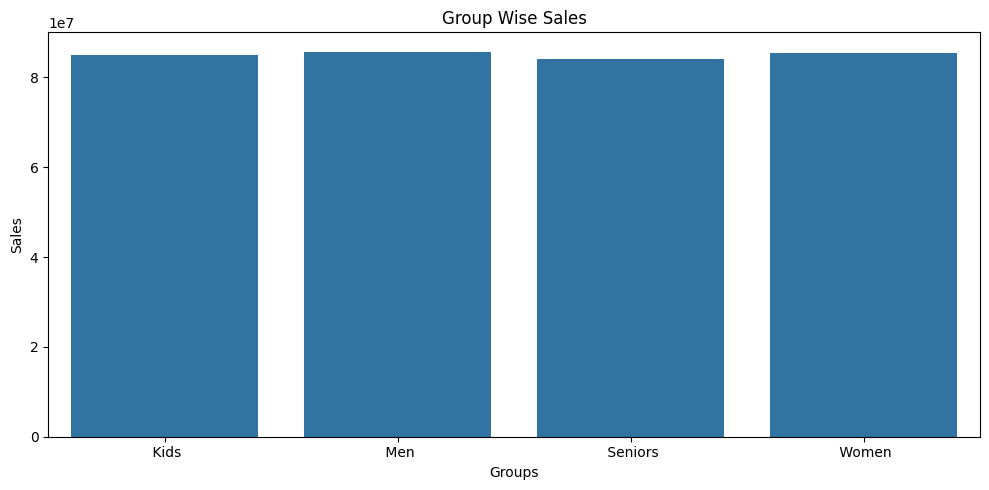

In [40]:
#2. Group Wise (' Kids' ' Men' ' Women' ' Seniors') sale Analysis for different states


grouped_df = df.groupby(['group'])['sales'].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_df, x='group', y='sales')

plt.title('Group Wise Sales')
plt.xlabel('Groups')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
grouped_df.sort_values(by='sales', ascending=False)
# Order of group wise sales in that quarter.

,group,sales
1,Men,85750000
3,Women,85442500
0,Kids,85072500
2,Seniors,84037500


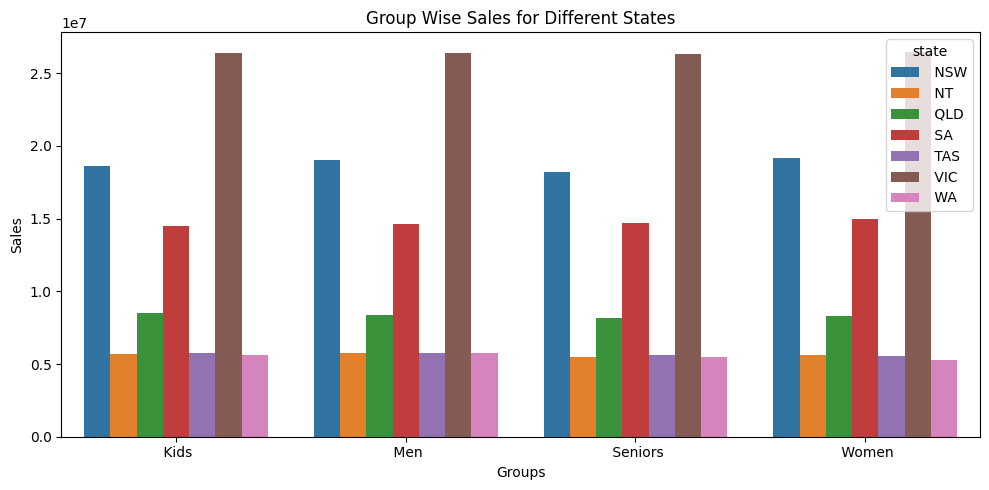

In [43]:
grouped_df = df.groupby(['group', 'state'])['sales'].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data= grouped_df, x='group', y='sales', hue='state')

plt.title('Group Wise Sales for Different States')
plt.xlabel('Groups')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

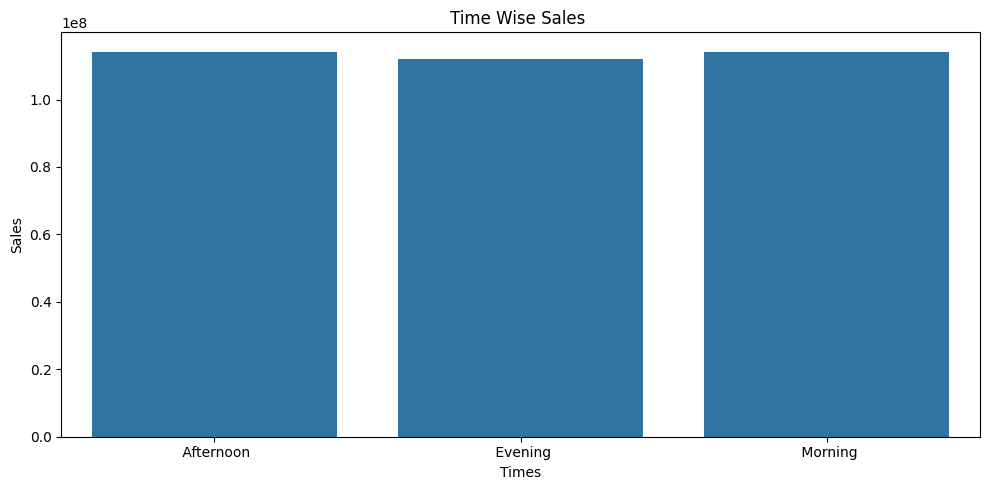

In [47]:
#3. Time Wise  sale Analysis to identify peak and off peak sales period.

grouped_df = df.groupby(['time'])['sales'].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data= grouped_df, x='time', y='sales')

plt.title('Time Wise Sales ')
plt.xlabel('Times')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [50]:
grouped_df.sort_values(by = 'sales', ascending=False)
# Morning sales are highest followed by Afternoon and evening.

,time,sales
2,Morning,114207500
0,Afternoon,114007500
1,Evening,112087500


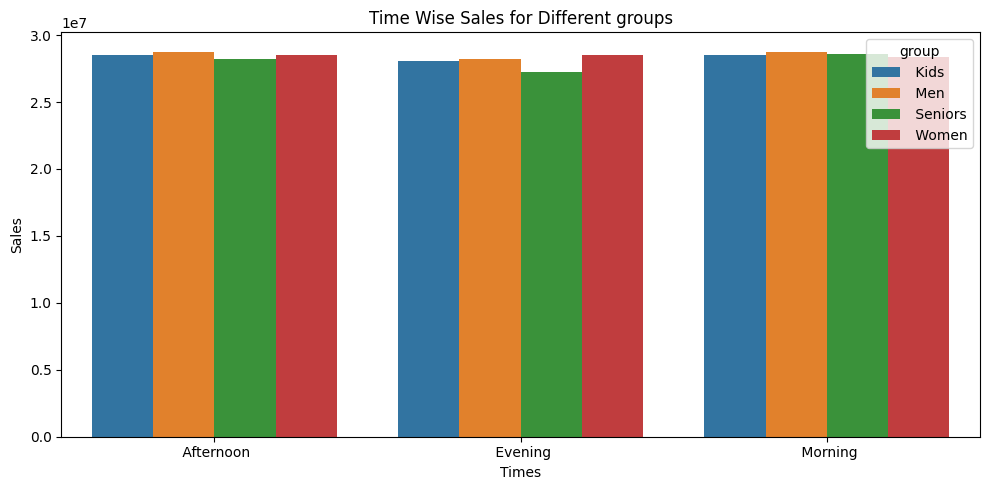

In [51]:
grouped_df = df.groupby(['time', 'group'])['sales'].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data= grouped_df, x='time', y='sales', hue='group')

plt.title('Time Wise Sales for Different groups')
plt.xlabel('Times')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
# In the Evening women shopped the most in that quarter
# And in the morning and afternoon men shop the most.
# Senior shops the least

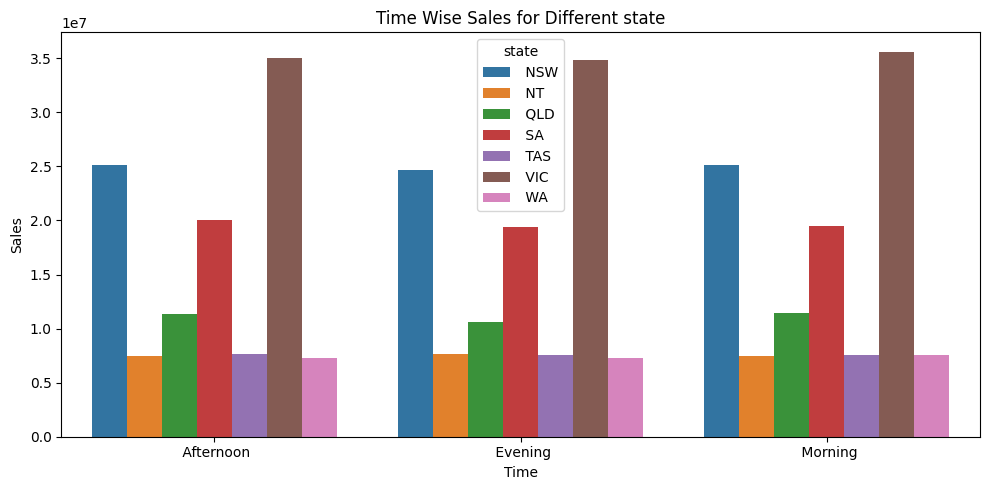

In [116]:

grouped_df = df.groupby(['time', 'state'])['sales'].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data= grouped_df, x='time', y='sales', hue='state')

plt.title('Time Wise Sales for Different state')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
